In [1]:
# import packages

In [2]:
# read data

## Data overlook

In [1]:
#%matplotlib inline
#!pip install imblearn
#!pip install -U imbalanced-learn
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import time
from pylab import *
#!pip install plotly-express
import plotly.express as px
#!pip install autots
from autots import AutoTS

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.kernel_ridge import KernelRidge

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity='all'

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [3]:
bank = pd.read_csv("bank-additional-full.csv")

In [4]:
bank.info()
print(bank.head())
print(bank.isnull().sum())
bank.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
bank['campaign'] = bank['campaign'].astype(int)
bank['pdays'] = bank['pdays'].astype(int)
bank['duration'] = bank['duration'].astype(int)
bank['emp.var.rate'] = bank['emp.var.rate'].astype(int)
bank['cons.price.idx'] = bank['cons.price.idx'].astype(int)
bank['cons.conf.idx'] = bank['cons.conf.idx'].astype(int)
bank['cons.price.idx'] = bank['cons.price.idx'].astype(int)

In [6]:
outcome = bank['y']

C:\Users\Angela Chen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


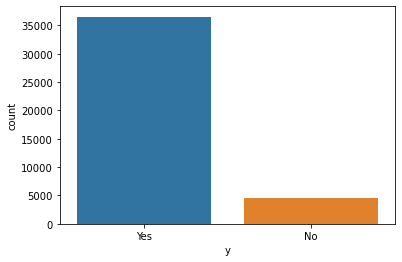

In [7]:
#The dataset is imbalanced
g = sns.countplot(bank['y'])
g.set_xticklabels(['Yes','No'])
plt.show()

In [12]:
bank['y'].count()

41188

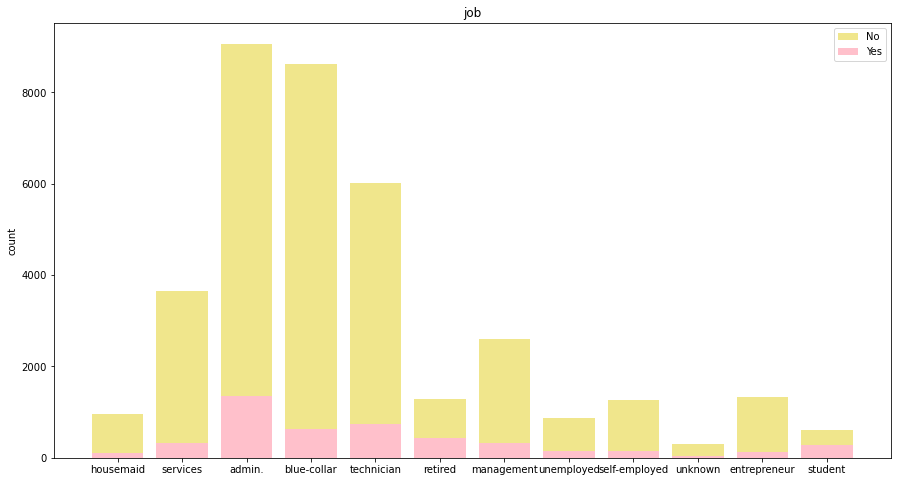

{'housemaid': 0.1, 'services': 0.08138070042831948, 'admin.': 0.12972558050278257, 'blue-collar': 0.06894315971471796, 'technician': 0.10826041821147857, 'retired': 0.25232558139534883, 'management': 0.1121751025991792, 'unemployed': 0.14201183431952663, 'self-employed': 0.10485573539760731, 'unknown': 0.11212121212121212, 'entrepreneur': 0.08516483516483517, 'student': 0.3142857142857143}


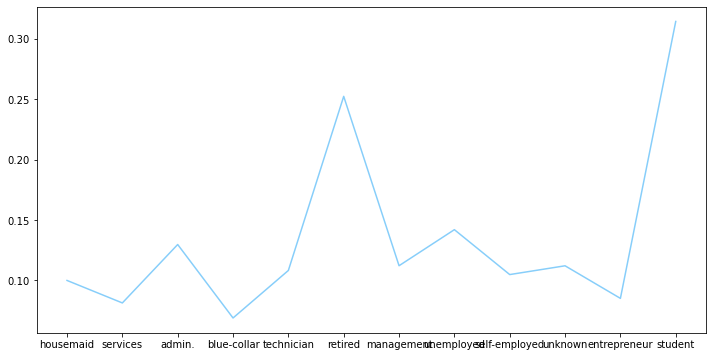

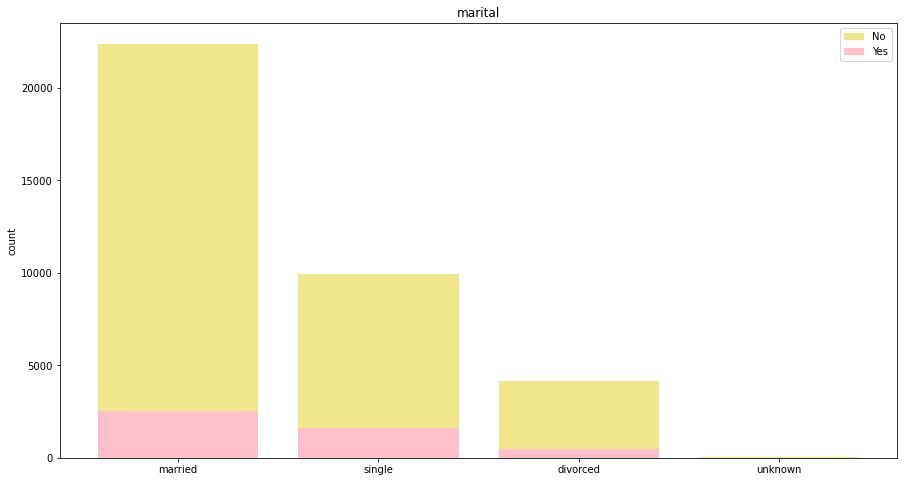

{'married': 0.10157252888318356, 'single': 0.1400414937759336, 'divorced': 0.10320901994796183, 'unknown': 0.15}


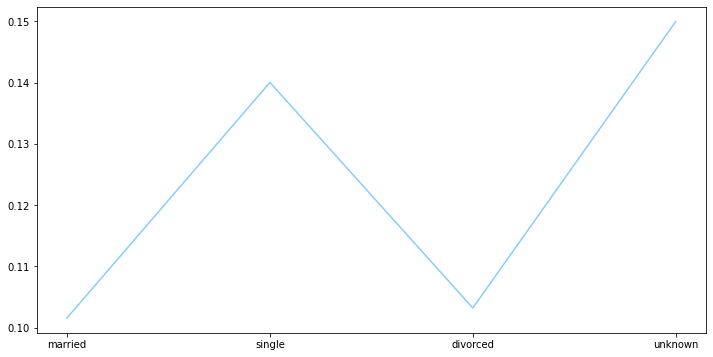

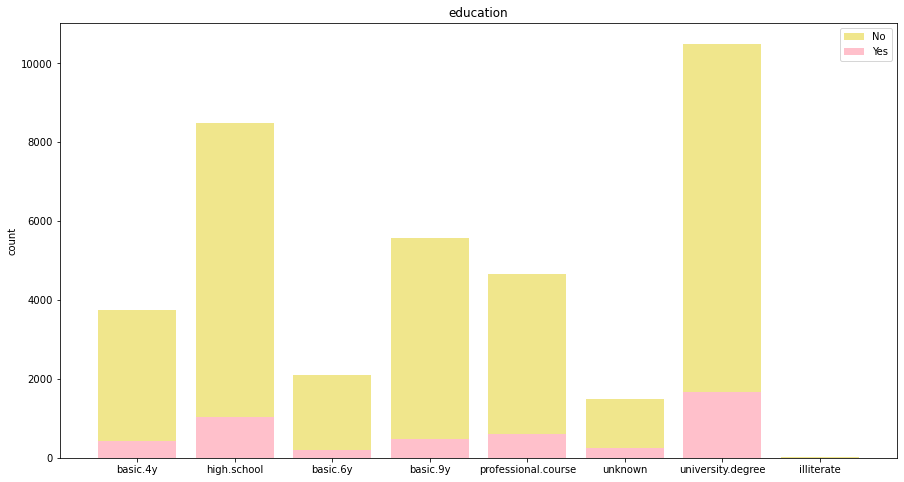

{'basic.4y': 0.1024904214559387, 'high.school': 0.10835522858644246, 'basic.6y': 0.08202443280977312, 'basic.9y': 0.0782464846980976, 'professional.course': 0.11348464619492657, 'unknown': 0.14500288850375506, 'university.degree': 0.13724523339907954, 'illiterate': 0.2222222222222222}


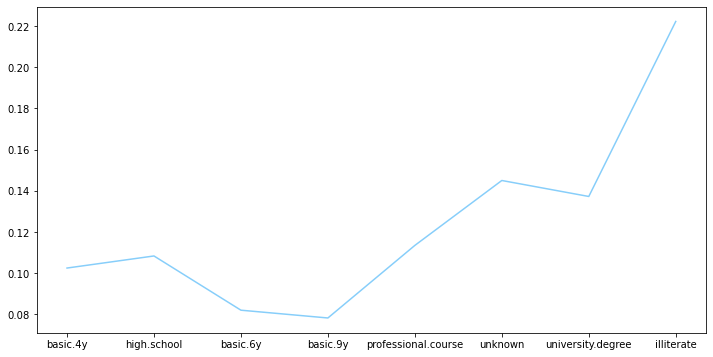

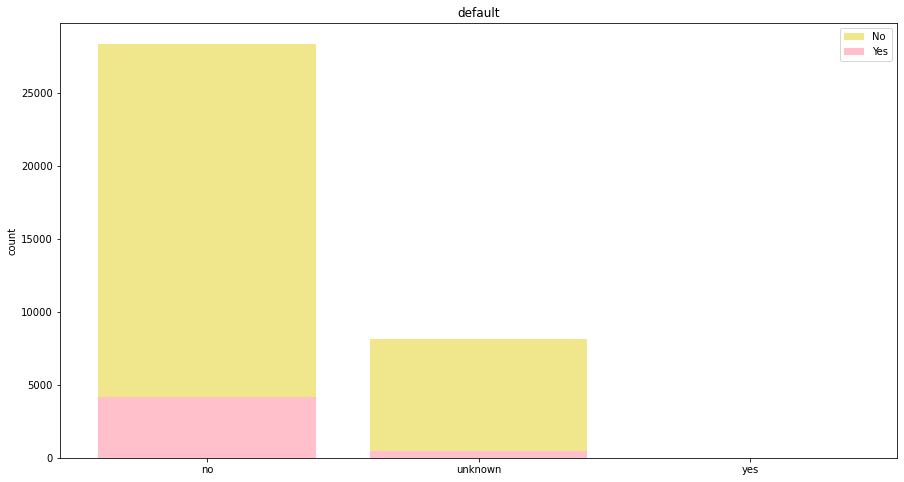

{'no': 0.12878973855406897, 'unknown': 0.051529603350005816, 'yes': 0.0}


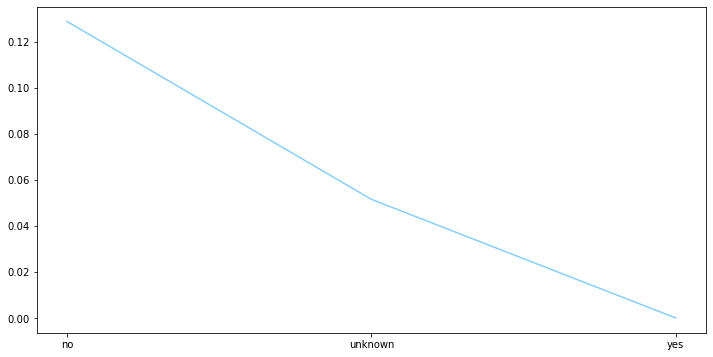

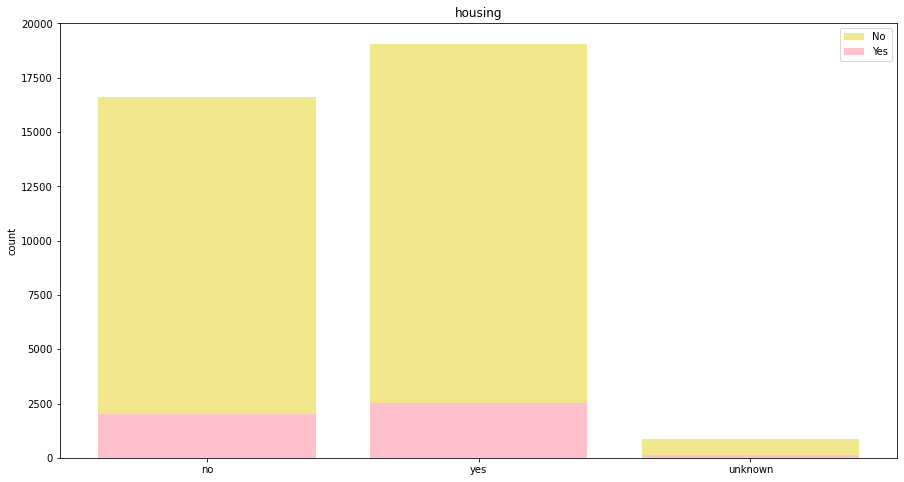

{'no': 0.10879604768553323, 'yes': 0.11619391916944753, 'unknown': 0.10808080808080808}


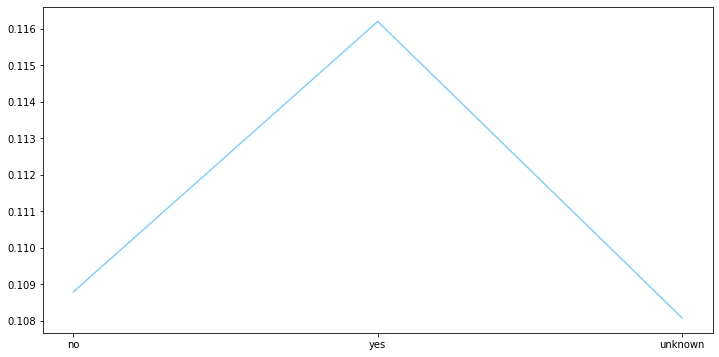

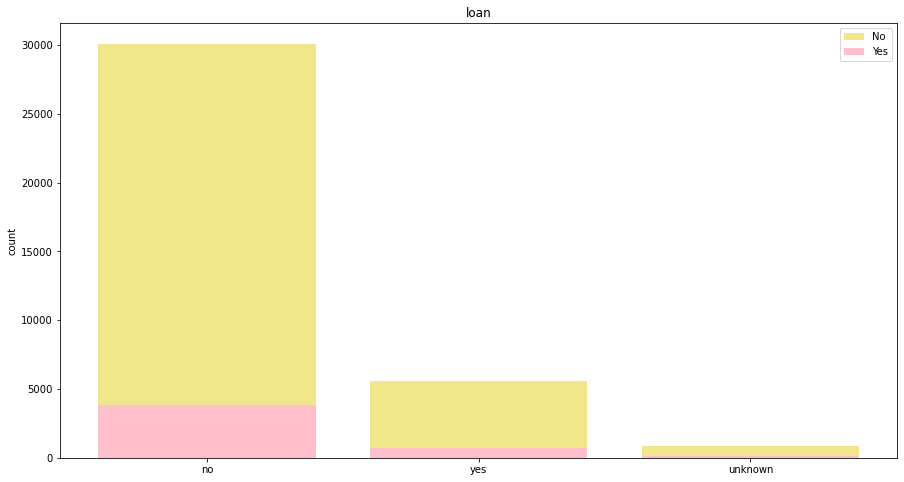

{'no': 0.1134020618556701, 'yes': 0.10931498079385403, 'unknown': 0.10808080808080808}


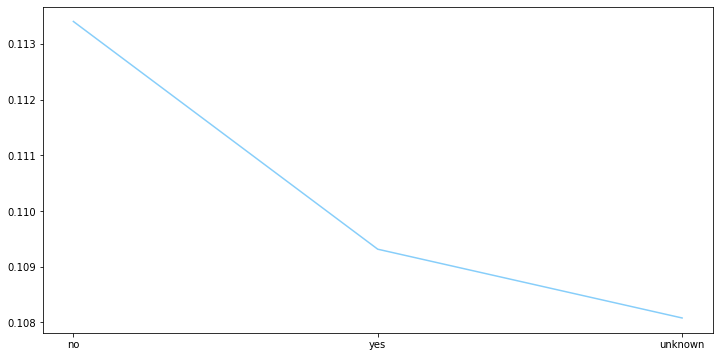

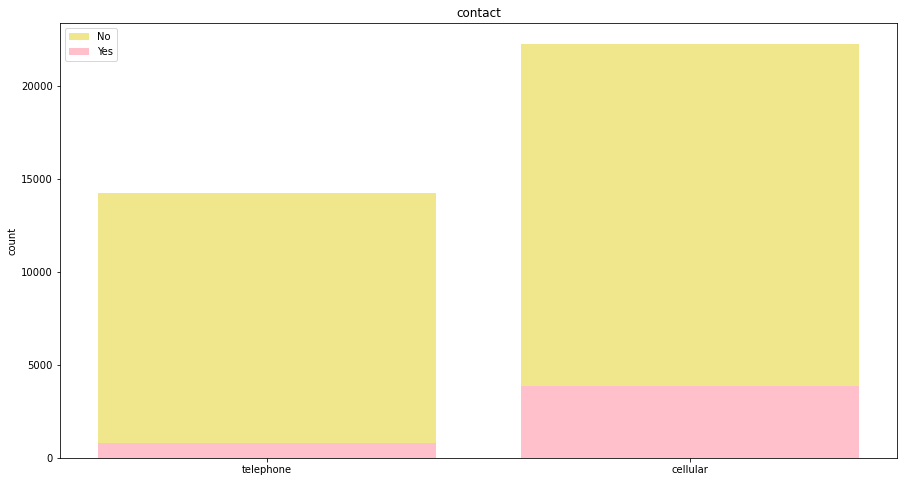

{'telephone': 0.05231321457059293, 'cellular': 0.14737607099143207}


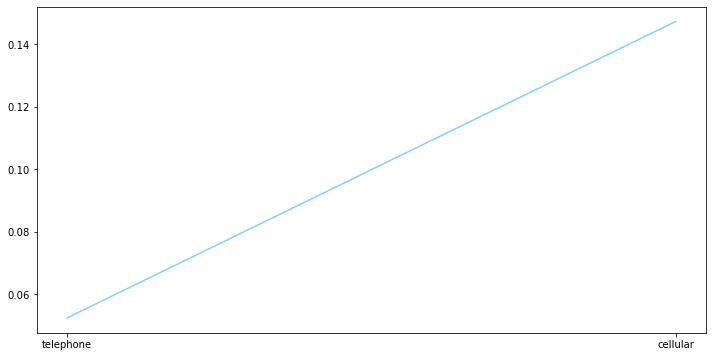

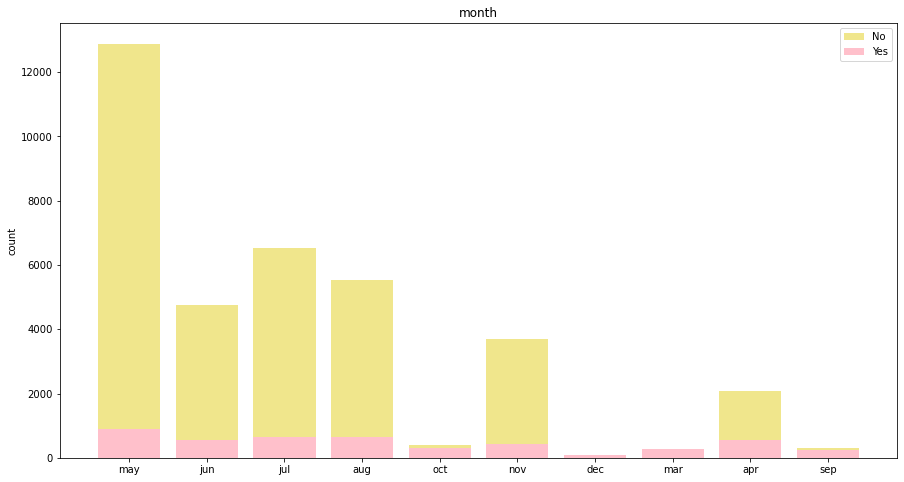

{'may': 0.06434744716391895, 'jun': 0.10511470477623167, 'jul': 0.09046557011430165, 'aug': 0.1060213661379087, 'oct': 0.4387186629526462, 'nov': 0.10143867349426969, 'dec': 0.489010989010989, 'mar': 0.5054945054945055, 'apr': 0.2047872340425532, 'sep': 0.44912280701754387}


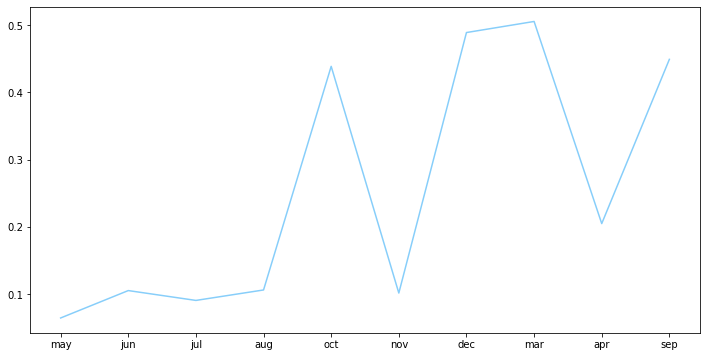

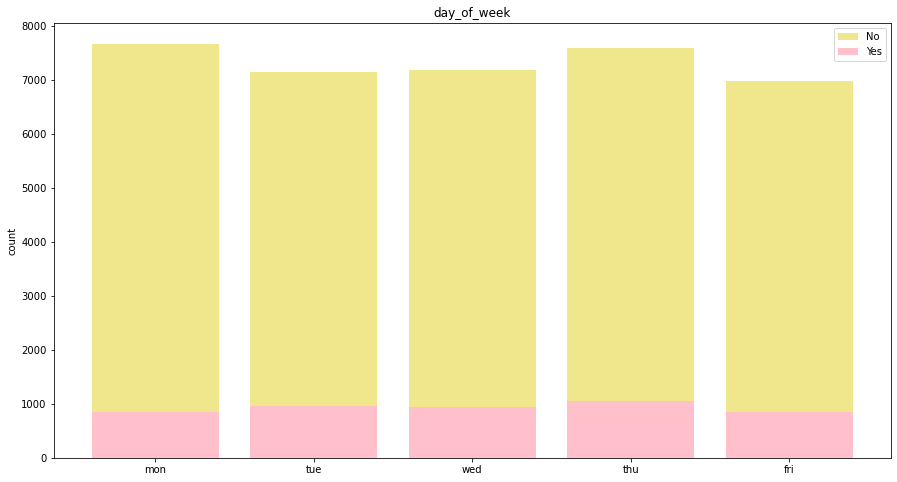

{'mon': 0.09948320413436693, 'tue': 0.11779975278121137, 'wed': 0.11667076469141874, 'thu': 0.12118752174417256, 'fri': 0.1080873898045228}


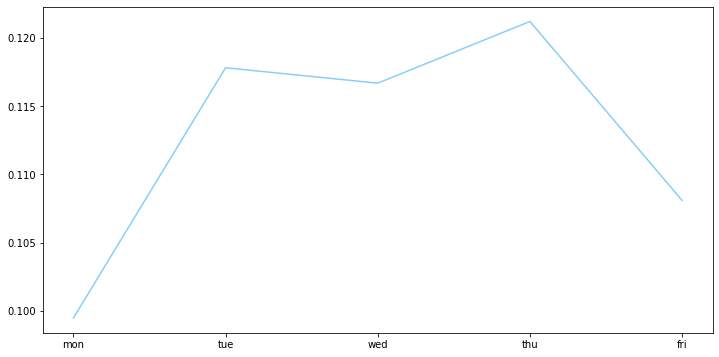

In [46]:
for k in range (1,10):
    no = []
    yes = []
    dic = {}
    for i in bank.iloc[:,k].unique():
        newdf = bank.loc[bank.iloc[:,k]==i]    
        no.append((newdf['y']=='no').sum())
        yes.append((newdf['y']=='yes').sum())
        dic[i]= (newdf['y']=='yes').sum()/(newdf['y'].count())

    fig, ax = plt.subplots(figsize=(15,8))
    one = ax.bar(bank.iloc[:,k].unique(), no, label='No',color = 'khaki')
    two = ax.bar(bank.iloc[:,k].unique(), yes, label='Yes',color = 'pink')
    #three = ax.plot(dic.keys(),dic.values(),label='Acceptance rate',color = 'lightskyblue')
    ax.set_ylabel('count')
    ax.set_title(bank.columns[k])
    ax.legend()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.plot(dic.keys(),dic.values(),label='Acceptance rate',color = 'lightskyblue')
    print(dic)
    

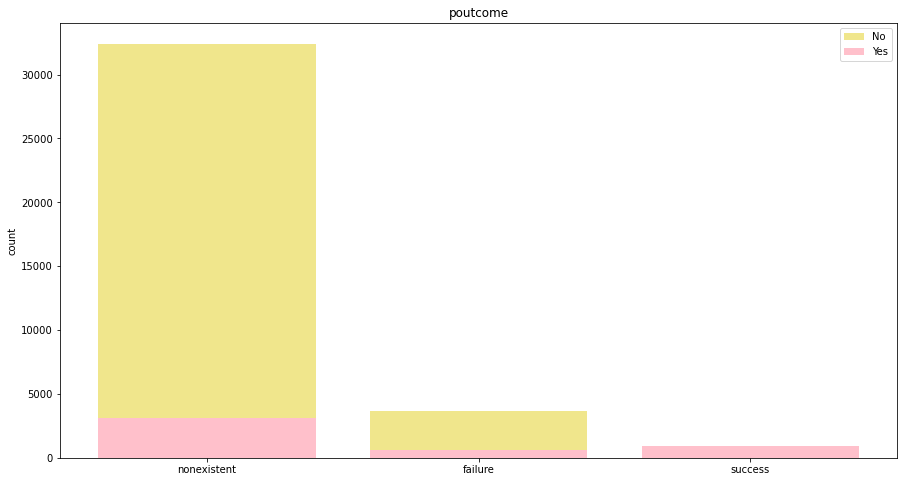

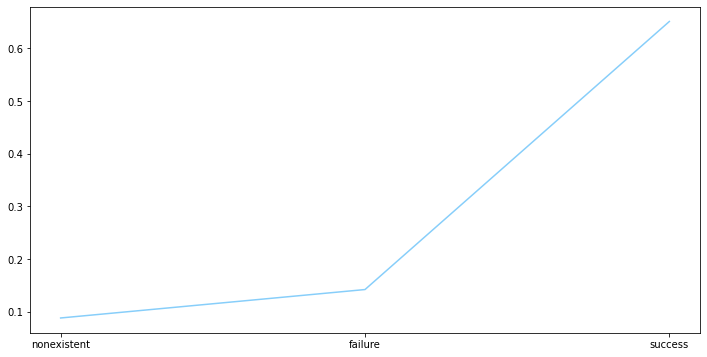

In [27]:
no = []
yes = []
dic = {}
for i in bank.iloc[:,14].unique():
    newdf = bank.loc[bank.iloc[:,14]==i]    
    no.append((newdf['y']=='no').sum())
    yes.append((newdf['y']=='yes').sum())
    dic[i]= (newdf['y']=='yes').sum()/(newdf['y'].count())

fig, ax = plt.subplots(figsize=(15,8))
one = ax.bar(bank.iloc[:,14].unique(), no, label='No',color = 'khaki')
two = ax.bar(bank.iloc[:,14].unique(), yes, label='Yes',color = 'pink')
ax.set_ylabel('count')
ax.set_title(bank.columns[14])
ax.legend()

plt.figure(figsize=(12, 6))
plt.plot(dic.keys(),dic.values(),label='Acceptance rate',color = 'lightskyblue')

plt.show()

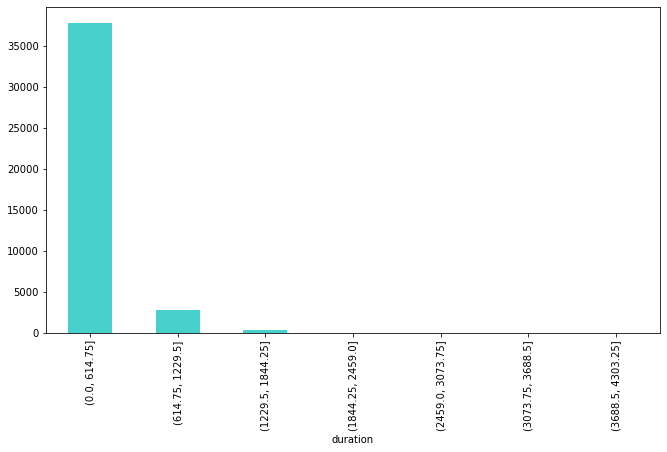

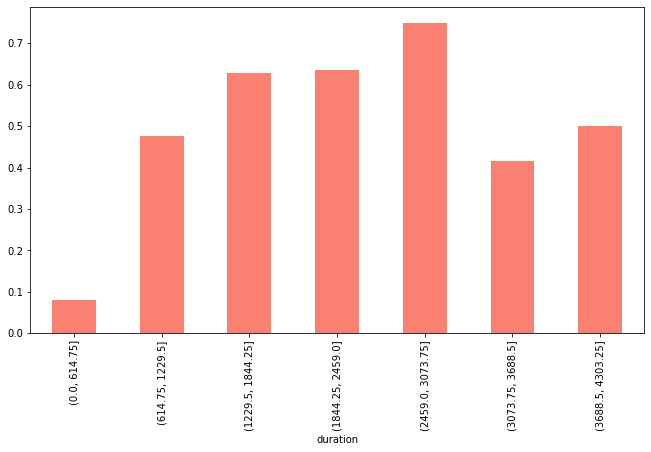

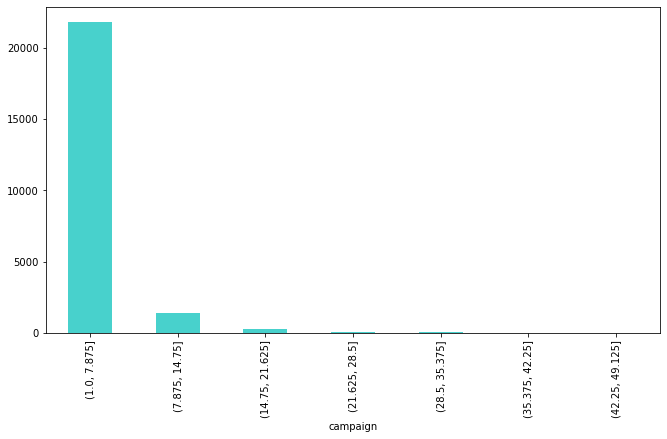

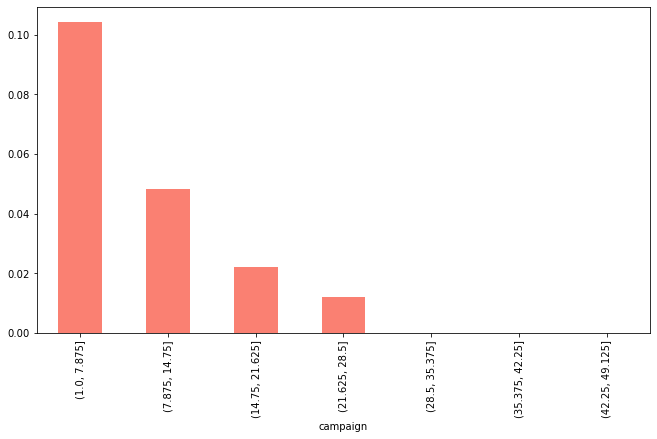

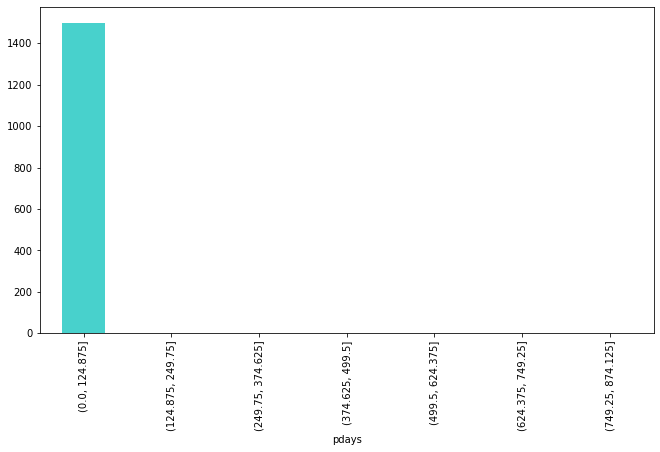

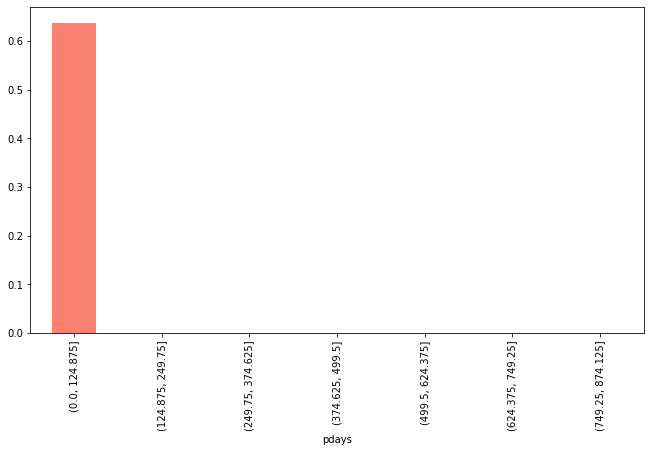

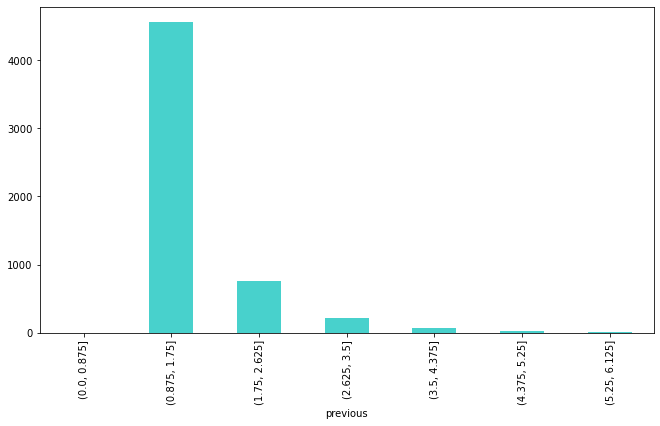

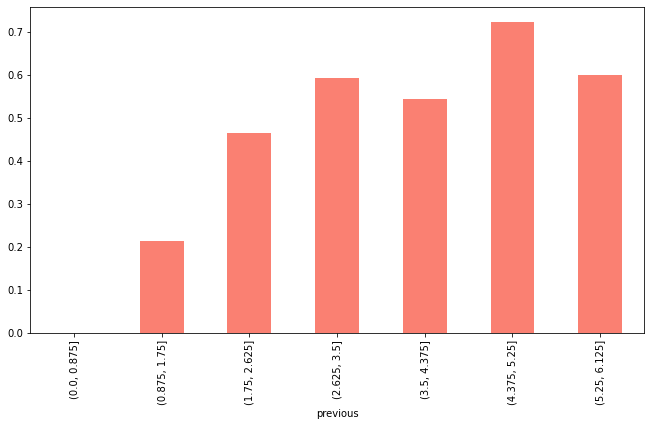

In [71]:
for k in range (10,14):
    no = []
    yes = []
    newdt = bank.loc[bank['y']=='yes']
    length = (bank.iloc[:,k].max()-bank.iloc[:,k].min())/8
    bins = np.arange(bank.iloc[:,k].min(),bank.iloc[:,k].max(),length)
    newbins1 = pd.cut(newdt.iloc[:,k],bins)
    newbins = pd.cut(bank.iloc[:,k],bins)
    y = newdt.groupby(newbins1)['y'].count()
    yall = bank.groupby(newbins)['y'].count()
    k = y/yall
    
    fig, ax = plt.subplots(figsize=(11,6))
    yall.plot(kind = 'bar',color = 'mediumturquoise')
    fig, ax = plt.subplots(figsize=(11,6))
    k.plot(kind = 'bar',color = 'salmon')

emp.var.rate
(-3.0, -2.5]         NaN
(-2.5, -2.0]    0.357186
(-2.0, -1.5]         NaN
(-1.5, -1.0]    0.204400
(-1.0, -0.5]         NaN
(-0.5, 0.0]     0.063092
(0.0, 0.5]           NaN
Name: y, dtype: float64
cons.price.idx
(92.0, 92.25]         NaN
(92.25, 92.5]         NaN
(92.5, 92.75]         NaN
(92.75, 93.0]    0.074241
(93.0, 93.25]         NaN
(93.25, 93.5]         NaN
(93.5, 93.75]         NaN
Name: y, dtype: float64
cons.conf.idx
(-50.0, -47.0]    0.200977
(-47.0, -44.0]    0.090455
(-44.0, -41.0]    0.053492
(-41.0, -38.0]    0.470289
(-38.0, -35.0]    0.049921
(-35.0, -32.0]    0.508883
(-32.0, -29.0]    0.385940
Name: y, dtype: float64
euribor3m
(0.634, 1.185]    0.456726
(1.185, 1.737]    0.144166
(1.737, 2.288]    0.455882
(2.288, 2.84]          NaN
(2.84, 3.391]     0.333333
(3.391, 3.942]    0.000000
(3.942, 4.494]    0.050432
Name: y, dtype: float64
nr.employed
(4963.6, 4996.662]      0.521345
(4996.662, 5029.725]    0.481247
(5029.725, 5062.788]         NaN
(5062.

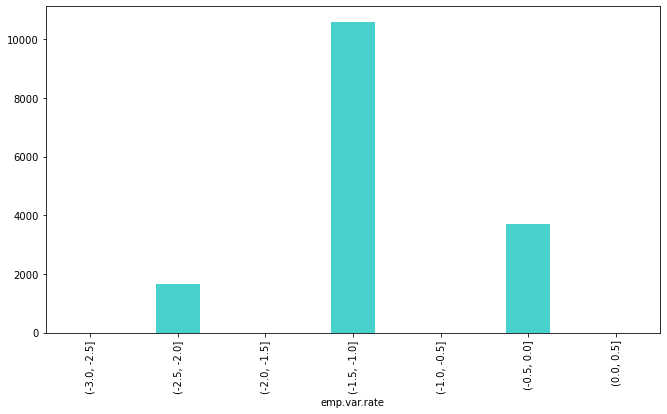

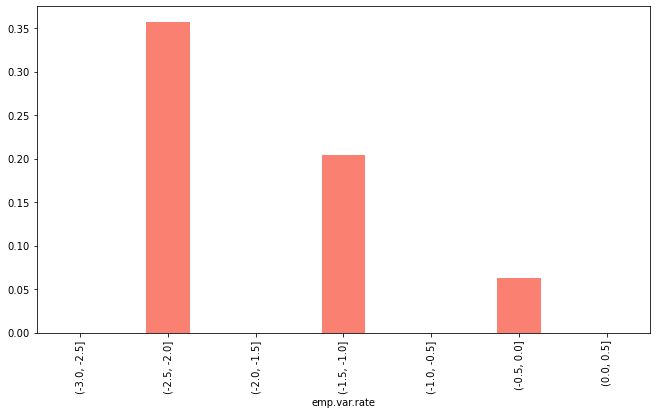

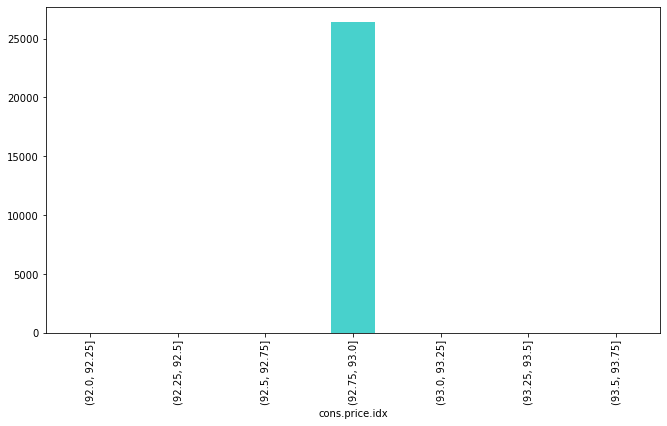

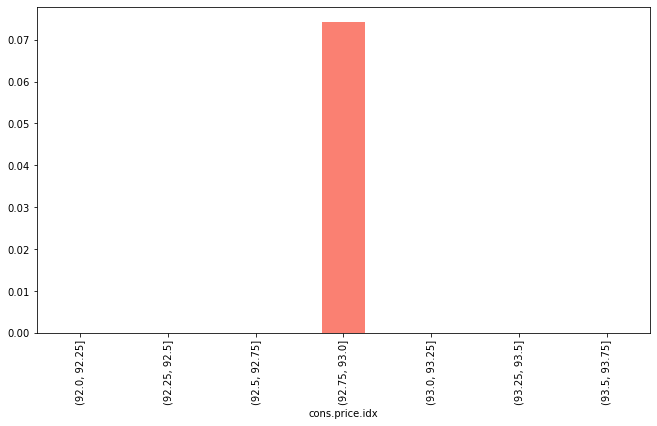

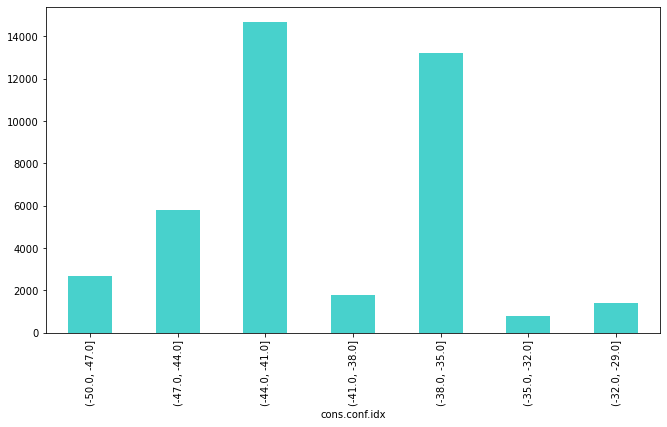

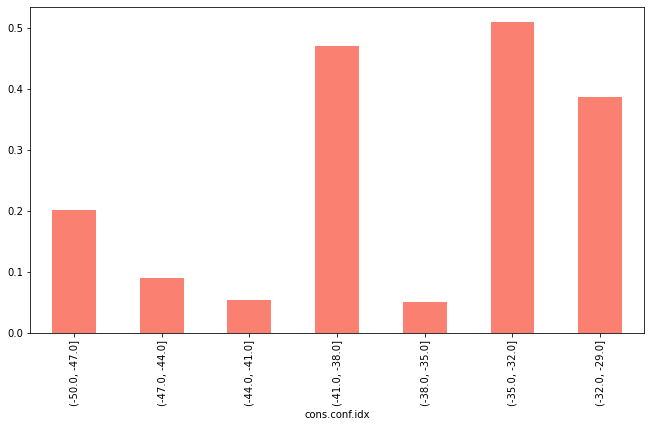

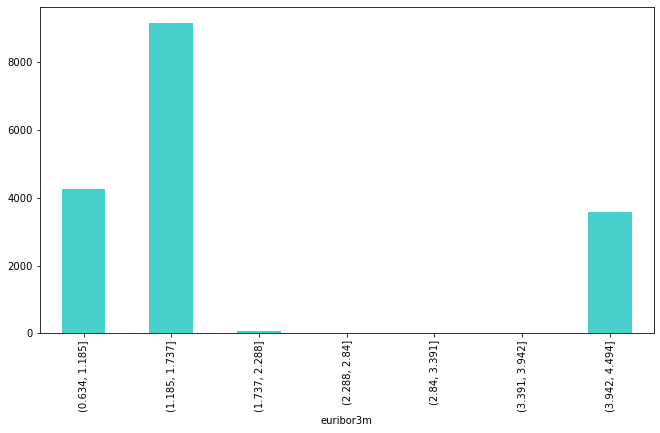

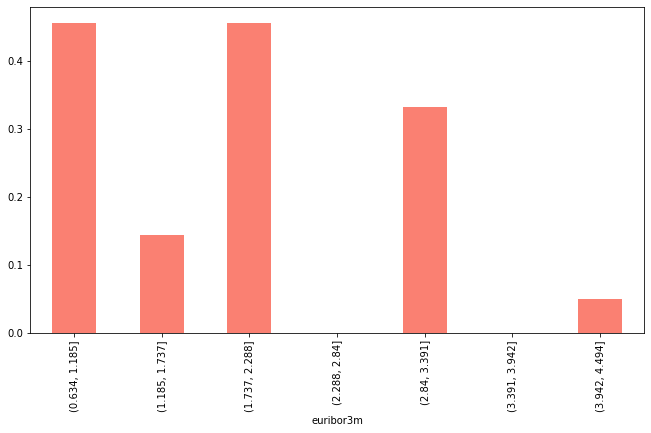

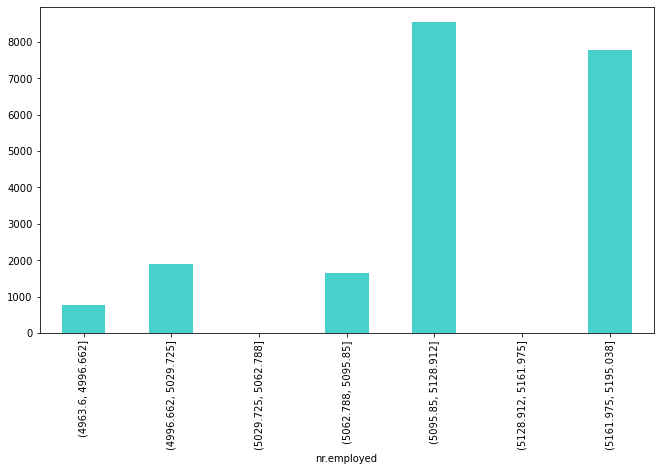

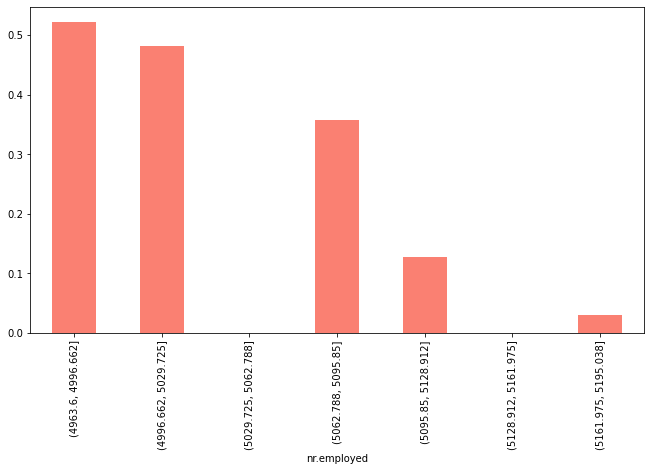

In [69]:
for k in range (15,20):
    no = []
    yes = []
    newdt = bank.loc[bank['y']=='yes']
    length = (bank.iloc[:,k].max()-bank.iloc[:,k].min())/8
    bins = np.arange(bank.iloc[:,k].min(),bank.iloc[:,k].max(),length)
    newbins1 = pd.cut(newdt.iloc[:,k],bins)
    newbins = pd.cut(bank.iloc[:,k],bins)
    y = newdt.groupby(newbins1)['y'].count()
    yall = bank.groupby(newbins)['y'].count()
    k = y/yall
    print(k)
    fig, ax = plt.subplots(figsize=(11,6))
    yall.plot(kind = 'bar',color = 'mediumturquoise')
    fig, ax = plt.subplots(figsize=(11,6))
    k.plot(kind = 'bar',color = 'salmon')

In [12]:
bank2 = bank.copy()
d = {'no': 0, 'yes': 1}
bank2['y'] = bank2['y'].map(d).fillna(bank2['y'])

<AxesSubplot:>

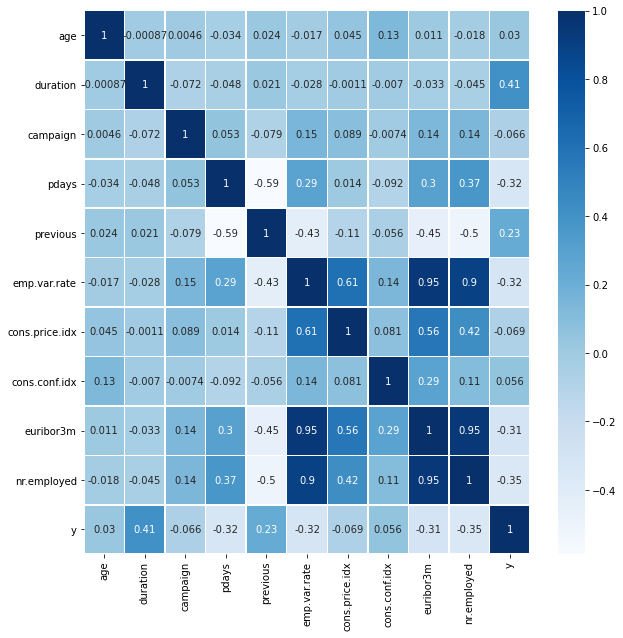

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(bank2.corr(),annot=True,cmap='Blues',linewidths=.5)

In [14]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [15]:
box = ['marital','education','default','housing','loan','contact','poutcome']
for i in box:
    print(bank[i].value_counts())

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


In [16]:
#random forest method of handling Na values
# @copyright Zhihui Chen
process_df = bank[['marital','age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
known = process_df[process_df.marital!='unknown'].values
unknown = process_df[process_df.marital=='unknown'].values
X = known[:,1:]
y = known[:,0]
rfr = RandomForestClassifier(n_estimators=2000,n_jobs = -1)
rfr.fit(X,y)
predicted = rfr.predict(unknown[:,1::])
bank.loc[(bank.marital == 'unknown'),'marital'] = predicted

In [17]:
process_df = bank[['default','age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
known = process_df[process_df.default!='unknown'].values
unknown = process_df[process_df.default=='unknown'].values
X = known[:,1:]
y = known[:,0]
rfr = RandomForestClassifier(n_estimators=2000,n_jobs = -1)
rfr.fit(X,y)
predicted = rfr.predict(unknown[:,1::])
bank.loc[(bank.default == 'unknown'),'default'] = predicted

In [18]:
process_df = bank[['education','age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
known = process_df[process_df.education!='unknown'].values
unknown = process_df[process_df.education=='unknown'].values
X = known[:,1:]
y = known[:,0]
rfr = RandomForestClassifier(n_estimators=2000,n_jobs = -1)
rfr.fit(X,y)
predicted = rfr.predict(unknown[:,1::])
bank.loc[(bank.education == 'unknown'),'education'] = predicted

In [19]:
process_df = bank[['loan','age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
known = process_df[process_df.loan!='unknown'].values
unknown = process_df[process_df.loan=='unknown'].values
X = known[:,1:]
y = known[:,0]
rfr = RandomForestClassifier(n_estimators=2000,n_jobs = -1)
rfr.fit(X,y)
predicted = rfr.predict(unknown[:,1::])
bank.loc[(bank.loan == 'unknown'),'loan'] = predicted

In [20]:
process_df = bank[['housing','age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
known = process_df[process_df.housing!='unknown'].values
unknown = process_df[process_df.housing=='unknown'].values
X = known[:,1:]
y = known[:,0]
rfr = RandomForestClassifier(n_estimators=2000,n_jobs = -1)
rfr.fit(X,y)
predicted = rfr.predict(unknown[:,1::])
bank.loc[(bank.housing == 'unknown'),'housing'] = predicted

In [21]:
process_df = bank[['poutcome','age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
known = process_df[process_df.poutcome!='nonexistent'].values
unknown = process_df[process_df.poutcome=='nonexistent'].values
X = known[:,1:]
y = known[:,0]
rfr = RandomForestClassifier(n_estimators=2000,n_jobs = -1)
rfr.fit(X,y)
predicted = rfr.predict(unknown[:,1::])
bank.loc[(bank.poutcome == 'nonexistent'),'poutcome'] = predicted

In [22]:
for i in box:
    print(bank[i].value_counts())

married     24977
single      11591
divorced     4620
Name: marital, dtype: int64
university.degree      12729
high.school             9944
basic.9y                6269
professional.course     5390
basic.4y                4470
basic.6y                2368
illiterate                18
Name: education, dtype: int64
no     41185
yes        3
Name: default, dtype: int64
yes    22123
no     19065
Name: housing, dtype: int64
no     34911
yes     6277
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
failure    39815
success     1373
Name: poutcome, dtype: int64


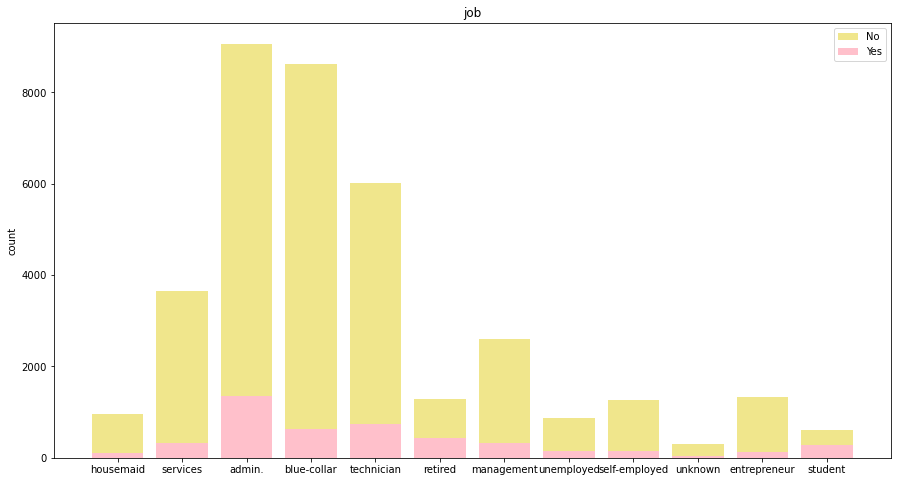

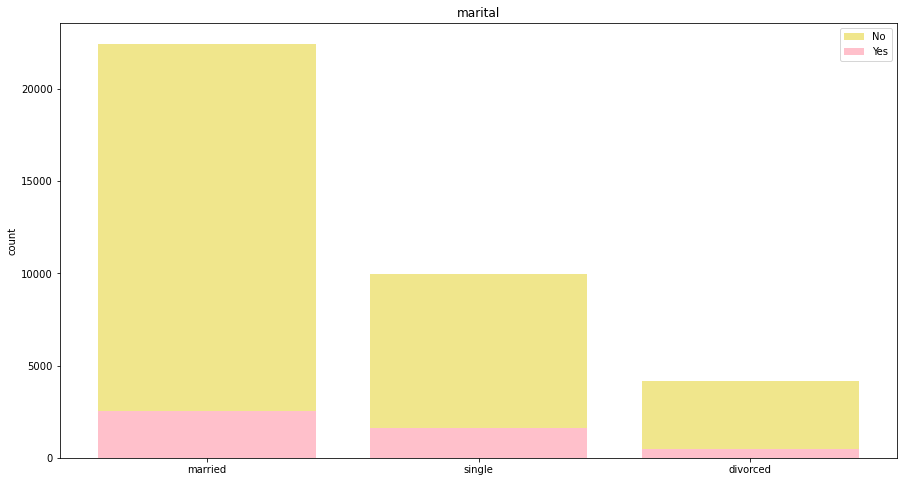

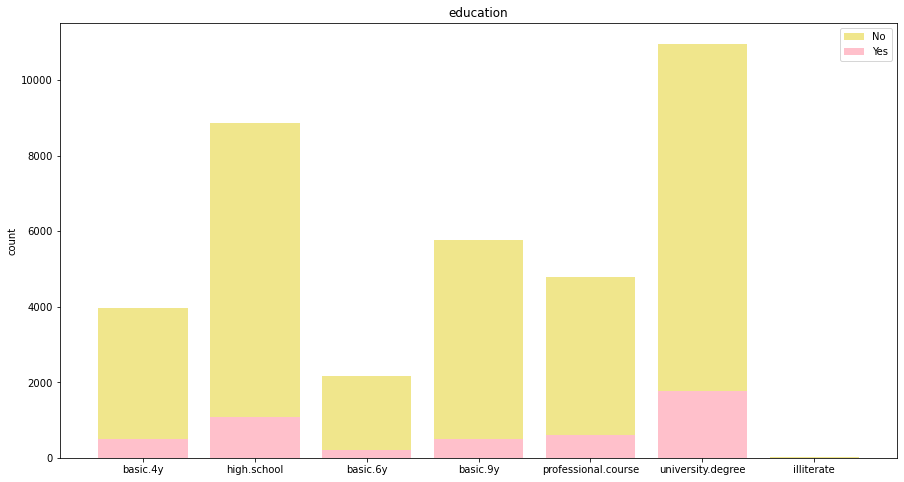

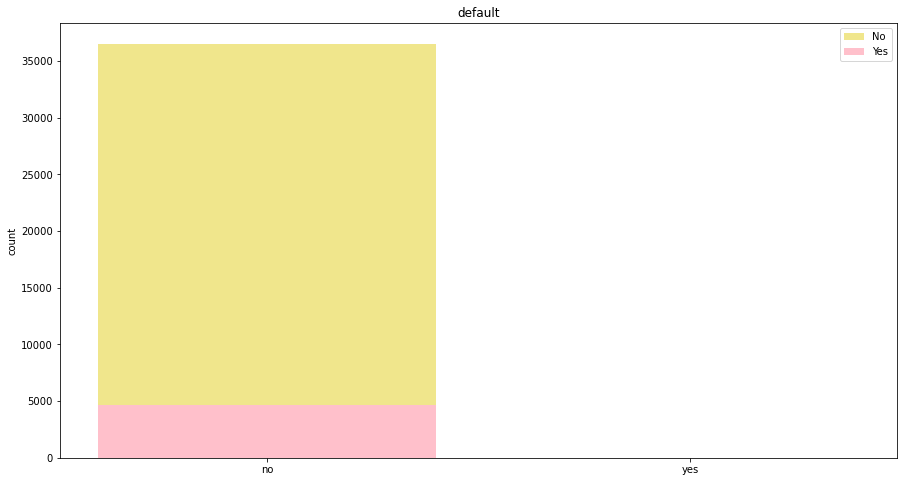

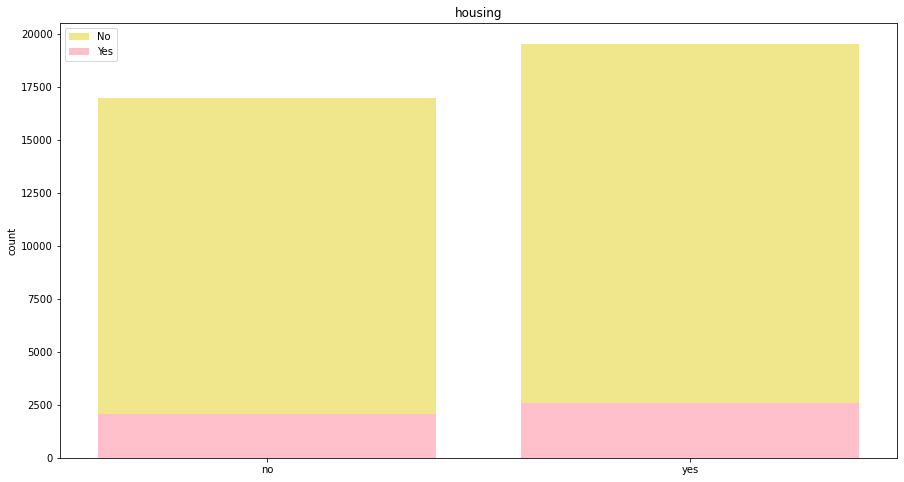

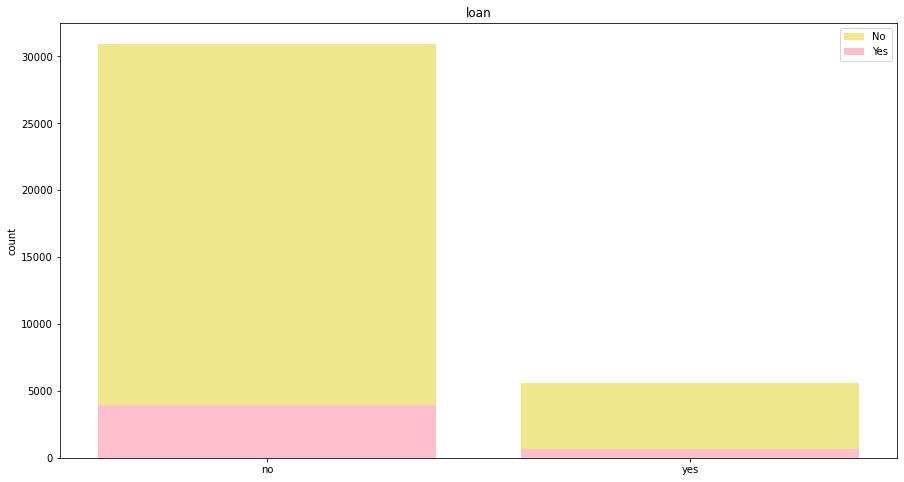

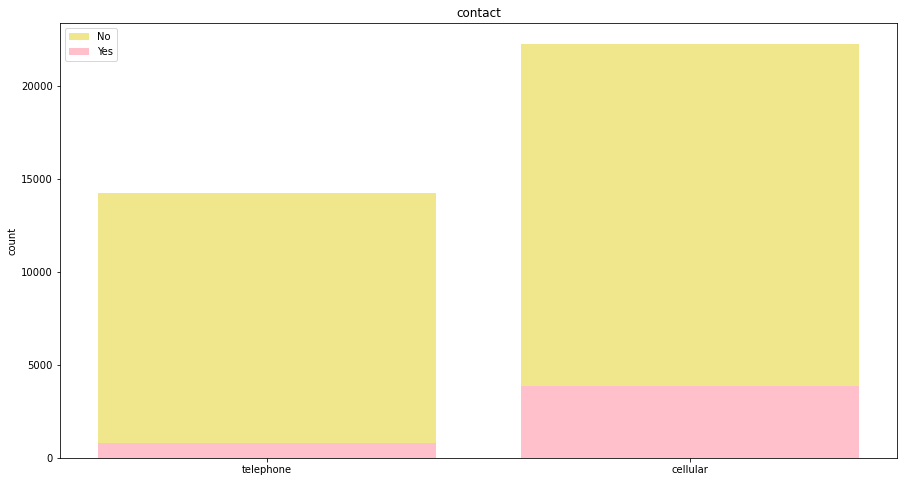

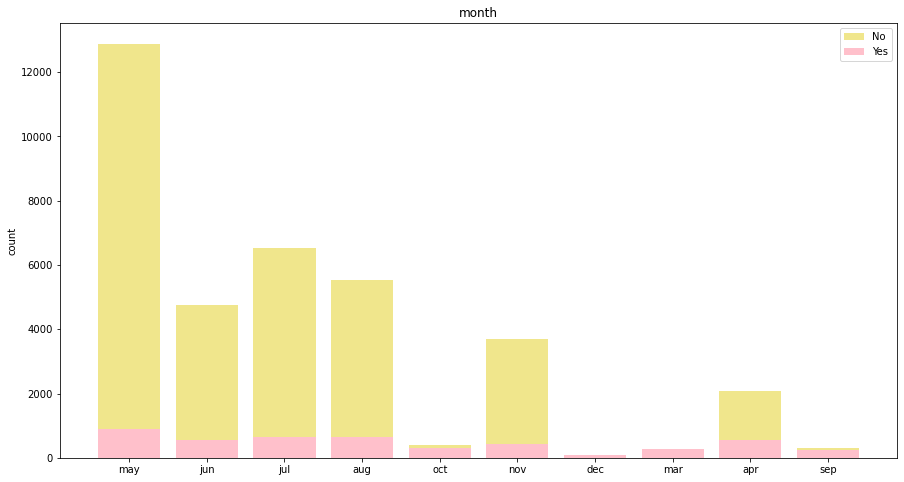

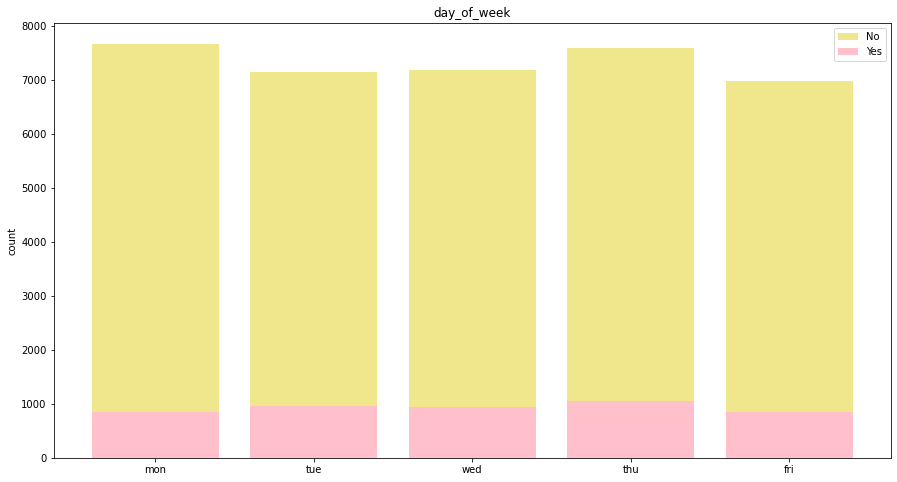

In [23]:
for k in range (1,10):
    no = []
    yes = []
    for i in bank.iloc[:,k].unique():
        newdf = bank.loc[bank.iloc[:,k]==i]    
        no.append((newdf['y']=='no').sum())
        yes.append((newdf['y']=='yes').sum())

    fig, ax = plt.subplots(figsize=(15,8))
    one = ax.bar(bank.iloc[:,k].unique(), no, label='No',color = 'khaki')
    two = ax.bar(bank.iloc[:,k].unique(), yes, label='Yes',color = 'pink')
    ax.set_ylabel('count')
    ax.set_title(bank.columns[k])
    ax.legend()
    plt.show()

In [24]:
#set dummies
predictors = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
banknew = pd.get_dummies(bank[predictors], drop_first=True)
banknew.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Here I used both oversampling and undersampling as two methods to balance the data. In the visualization part, the result od 'No' is far less than 'Yes' and the sample of 'NO' is less than 5000, so in the following model training process I firstly did the undersampling and randomly selected 0.15 of the new data.

In [25]:
#Undersampling
y = banknew['poutcome_success']
X = banknew.drop(columns=['poutcome_success'])
under = RandomUnderSampler(sampling_strategy=1)
X,y = under.fit_resample(X,y)
y = pd.DataFrame(y)
dt1 = pd.concat([X,y],axis=1)
print(dt1.shape)
dt1.describe()

(2746, 33)


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success
count,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,...,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000
mean,0.159505,0.025127,0.026220,0.069192,0.077203,0.030226,0.073926,0.053168,0.158048,0.035688,...,0.152221,0.017844,0.130007,0.121631,0.034960,0.241442,0.112891,0.057902,0.057174,0.500000
std,0.366213,0.156541,0.159818,0.253826,0.266962,0.171239,0.261698,0.224410,0.364853,0.185546,...,0.359301,0.132409,0.336373,0.326919,0.183712,0.428036,0.316518,0.233601,0.232217,0.500091
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Angela Chen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


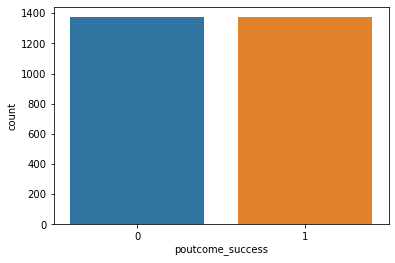

In [26]:
g = sns.countplot(dt1['poutcome_success'])
#g.set_xticklabels(['not have diabetes','Diabetes'])
plt.show()

In [27]:
#Oversampling
y = banknew['poutcome_success']
X = banknew.drop(columns=['poutcome_success'])
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)
y = pd.DataFrame(y)
dt = pd.concat([X,y],axis=1)
print(dt.shape)
dt.describe()

(79630, 33)


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success
count,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,...,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000
mean,1.371481,0.787090,0.859186,1.414630,1.381100,1.039633,1.580962,1.377948,2.427603,1.625141,...,0.973063,0.860693,1.051651,0.941379,0.812244,0.921763,0.962263,0.717481,0.881427,0.500000
std,14.478193,11.418236,11.919943,15.271492,14.887727,13.011661,16.006206,15.036271,19.634649,16.377826,...,11.800588,11.817291,12.638550,11.935680,11.562857,10.748380,12.023468,10.597167,11.951599,0.500003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,255.000000,254.000000,255.000000,255.000000,255.000000,254.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,254.000000,255.000000,255.000000,255.000000,1.000000


C:\Users\Angela Chen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


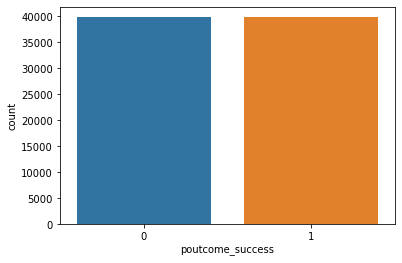

In [28]:
g = sns.countplot(dt['poutcome_success'])
#g.set_xticklabels(['not have diabetes','Diabetes'])
plt.show()

#### There are too many data, to run the models with over 70,000 data would be time consuming, then I used the function sample() to randomly select 10% of the generated balanced dataset

In [29]:
dt = dt.sample(frac= 0.1, random_state=8)
print(dt.shape)

(7963, 33)


### Rescaling

In [30]:
target = dt['poutcome_success']
dt.drop(columns='poutcome_success', axis=1, inplace=True)
scale = StandardScaler()
newdata = pd.DataFrame(scale.fit_transform(dt), columns=dt.columns)
newdata.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,-0.09773,-0.065253,-0.071153,-0.082426,-0.099522,-0.082314,-0.095391,-0.097559,-0.071168,-0.101213,...,-0.154245,-0.083689,-0.075962,-0.080347,-0.086615,-0.066947,-0.090345,-0.084561,0.040672,-0.075211
1,-0.09773,0.025429,-0.071153,-0.082426,-0.099522,-0.082314,-0.095391,-0.097559,-0.122481,-0.101213,...,-0.154245,-0.083689,-0.075962,0.003882,-0.086615,-0.066947,-0.090345,-0.084561,-0.067465,-0.075211
2,-0.09773,-0.065253,-0.071153,-0.082426,-0.099522,-0.082314,-0.095391,-0.097559,-0.071168,-0.101213,...,-0.110396,-0.083689,-0.075962,-0.080347,-0.086615,-0.066947,-0.090345,-0.008026,-0.067465,-0.075211
3,-0.09773,-0.065253,10.561763,-0.082426,-0.099522,-0.082314,-0.095391,-0.097559,-0.122481,-0.101213,...,-0.154245,-0.006441,-0.075962,-0.080347,-0.086615,-0.066947,-0.090345,-0.084561,-0.067465,-0.075211
4,-0.09773,-0.065253,-0.071153,-0.082426,-0.099522,-0.082314,-0.095391,-0.097559,3.469470,-0.101213,...,-0.154245,-0.083689,-0.075962,0.003882,-0.086615,-0.066947,-0.090345,-0.084561,-0.067465,-0.075211


In [31]:
X = newdata.copy()
y = target.copy()
print(X.shape)
print(y.shape)
le = LabelEncoder() 
for col in X.columns:
    X[col] = le.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

(7963, 32)
(7963,)


### PCA components selection

In [32]:
# choose PCA components
df_cov_matrix = np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(df_cov_matrix)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
total = sum(eig_vals)
var_exp = [(i /total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative variance captured as we travel with each component \n",cum_var_exp)
print("From above results, 29 components could capture 99% of the variance, I will keep 29 components in the following models.")

pca = PCA(n_components = 29)
X = pca.fit_transform(X)
#dfnew = pd.DataFrame(data=pcs, columns={'PC1','PC2','PC3','PC4'})
#dfnew['target'] = y
#dfnew.head()

Cumulative variance captured as we travel with each component 
 [ 29.03096788  48.81829426  61.64214168  69.05947831  73.43696377
  77.10884615  80.48515565  83.65107985  85.56565123  87.21309985
  88.74660622  90.16289042  91.22431342  92.26685871  93.16171012
  94.03024752  94.72680779  95.35549715  95.94899779  96.50047918
  97.01700031  97.4682133   97.90397985  98.30613857  98.68167177
  99.03859372  99.37526472  99.70569916  99.90442974  99.99990722
  99.99998453 100.        ]
From above results, 29 components could capture 99% of the variance, I will keep 29 components in the following models.


In [33]:
#Logistic regression
#knn
#Ridge with grid search
#lasso
#Kernel ridge model
#Use grid search to decide the depth of Decision tree
# Linear svm
#forest = RandomForestClassifier()

In [34]:
#a function store models and their scores into a dictionaty
model_score = {}
def getBestScore(model, testSize, nmc):
    if model == 'knn':
        best_nei = 0
        bestscore = 0
        for i in range(20):
            model = KNeighborsClassifier(n_neighbors=i+1)
            shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
            CVInfo = cross_validate(model, X, y, cv=shuffle, return_train_score=True)
            #testscorelist.append(np.mean(CVInfo['test_score']))
            if bestscore < np.mean(CVInfo['test_score']):
                bestscore = np.mean(CVInfo['test_score'])
                trainscore = np.mean(CVInfo['train_score'])
                best_nei = i
        modelnew = KNeighborsClassifier(n_neighbors=best_nei)
        modelnew.fit(X,y)
        #yhat = modelnew.predict(X)
        #cmat = confusion_matrix(y, yhat) 
        print(f'The score for test is {bestscore},with {best_nei} neighbors')
        model_score[model] = trainscore, bestscore
        #print(f'The confusion matrix for this model is {cmat}')
        
    else:
        shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
        CVInfo = cross_validate(model, X, y, cv=shuffle, return_train_score=True)
        trainscore = (np.mean(CVInfo['train_score']))
        testscore = (np.mean(CVInfo['test_score']))
        model_score[model] = trainscore,testscore
        print(f'The score for test is {testscore}')
        
    return model_score

In [37]:
from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

In [59]:
#a function store models and their scores into a dictionaty
model_score = {}
def getBestScore(model, testSize, nmc):
    if model == 'knn':
        best_nei = 0
        bestscore = 0
        for i in range(20):
            model = KNeighborsClassifier(n_neighbors=i+1)
            shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
            CVInfo = cross_validate(model, X, y, cv=shuffle, return_train_score=True)
            #testscorelist.append(np.mean(CVInfo['test_score']))
            if bestscore < np.mean(CVInfo['test_score']):
                bestscore = np.mean(CVInfo['test_score'])
                trainscore = np.mean(CVInfo['train_score'])
                best_nei = i
        modelnew = KNeighborsClassifier(n_neighbors=best_nei)
        modelnew.fit(X,y)
        #yhat = modelnew.predict(X)
        #cmat = confusion_matrix(y, yhat) 
        print(f'The score for test is {bestscore},with {best_nei} neighbors')
        model_score[model] = trainscore, bestscore
        #print(f'The confusion matrix for this model is {cmat}')
        
    else:
        shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
        CVInfo = cross_validate(model, X, y, cv=shuffle, return_train_score=True)
        trainscore = (np.mean(CVInfo['train_score']))
        testscore = (np.mean(CVInfo['test_score']))
        model_score[model] = trainscore,testscore
        print(f'The score for test is {testscore}')
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        fig, ax = plt.subplots(figsize=(16,13))
        for i, (train, test) in enumerate(shuffle.split(X, y)):
            model.fit(X[train], y[train])
            viz = RocCurveDisplay.from_estimator(
                model,
                X[test],
                y[test],
                name="ROC fold {}".format(i),
                alpha=0.3,
                lw=1,
                ax=ax,)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

        ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax.plot(
            mean_fpr,
            mean_tpr,
            color="b",
            label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=2,
            alpha=0.8,)

        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax.fill_between(
                mean_fpr,
                tprs_lower,
                tprs_upper,
                color="grey",
                alpha=0.2,
                label=r"$\pm$ 1 std. dev.",)

        ax.set(
                xlim=[-0.05, 1.05],
                ylim=[-0.05, 1.05],
                title="Receiver operating characteristic example",)
        ax.legend(loc="lower right")
        plt.show()
    return model_score

The confusion matrix is [[3558  361]
 [1390 2654]]


C:\Users\Angela Chen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Angela Chen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

The score for test is 0.7778804620793571


C:\Users\Angela Chen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Angela Chen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

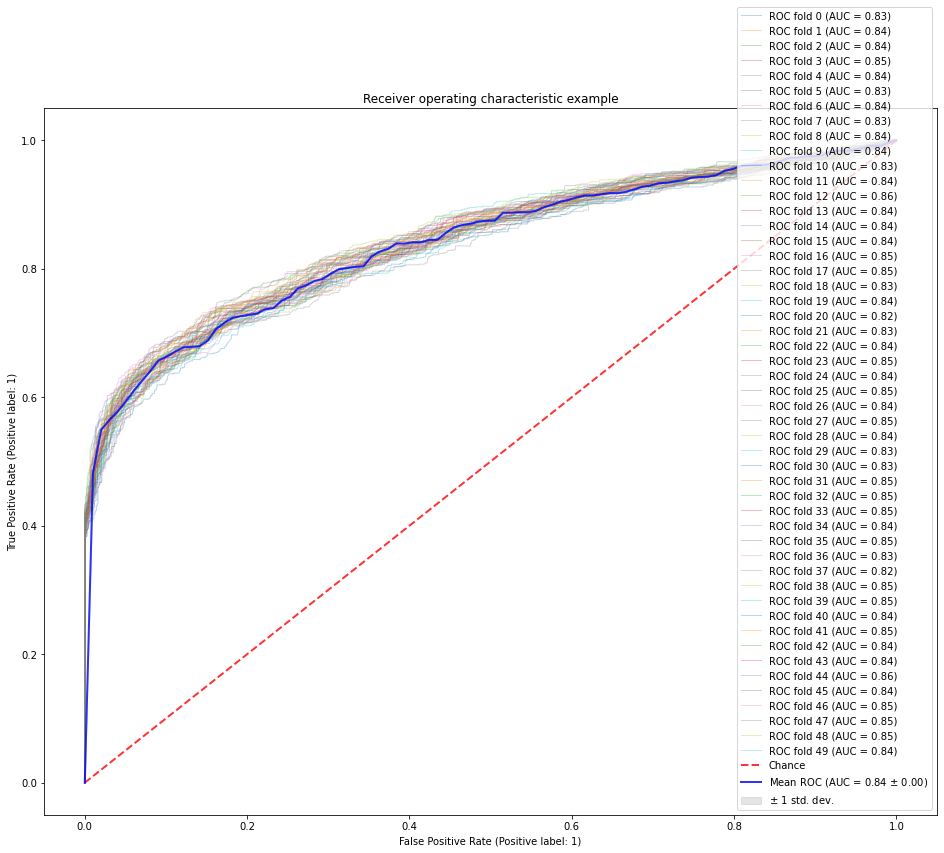

{LogisticRegression(penalty='none'): (0.7790924313462827, 0.7778804620793571)}

In [60]:
#Logistic regression
lr = LogisticRegression(penalty="none",solver="lbfgs")
lr.fit(X,y)
yhat = lr.predict(X)
cmat = confusion_matrix(y, yhat)
print(f'The confusion matrix is {cmat}')
getBestScore(lr, 0.25, 50)

The best ridge parameter is {'ridge__alpha': 0.1}.
The confusion matrix is [[3919    0]
 [2294 1750]]
The score for test is 0.7122852837769965


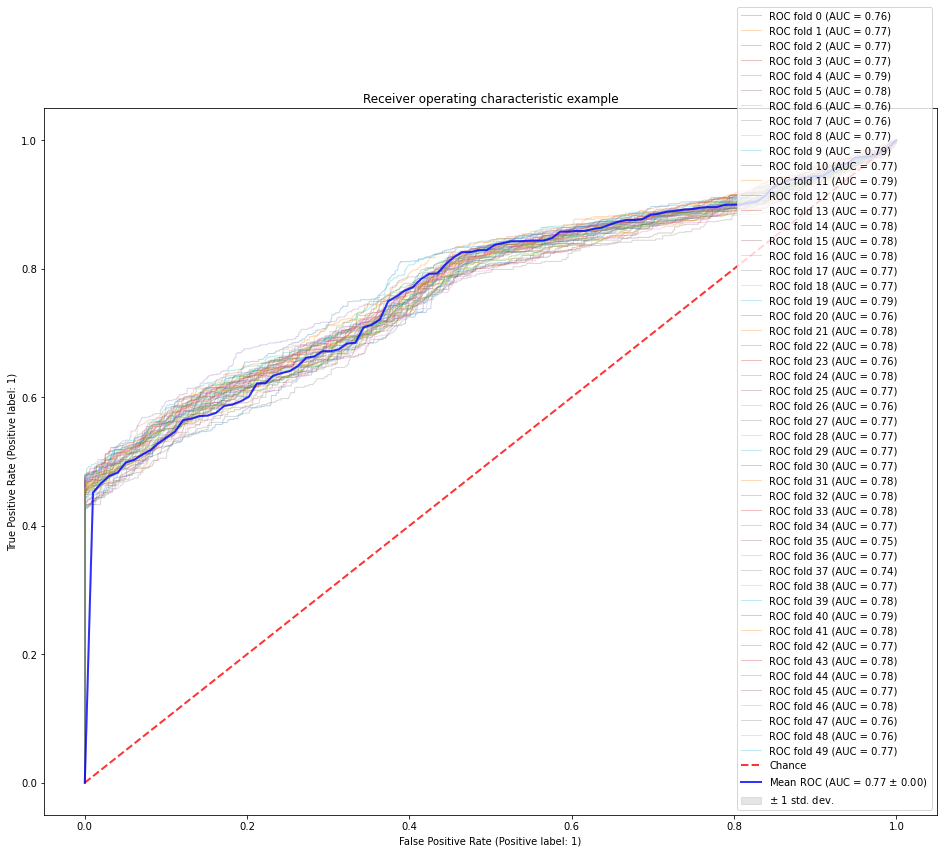

{LogisticRegression(penalty='none'): (0.7790924313462827, 0.7778804620793571),
 Pipeline(steps=[('ridge', RidgeClassifier(alpha=0.1))]): (0.7115572672471535,
  0.7122852837769965)}

In [61]:
#Ridge with grid search
fullModel = Pipeline([("ridge", RidgeClassifier())])
# set up dictionary for grid search
param_grid={'ridge__alpha':[0.1, 0.25, 0.5, 1., 2., 5., 10.,25.,50.,100.,150.,200.]}
# set up cross-validation shuffles
shuffle_split = ShuffleSplit(n_splits = 50, test_size=0.25)
grid_search=GridSearchCV(fullModel,param_grid,cv=shuffle_split,
                              return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
print(f'The best ridge parameter is {grid_search.best_params_}.')
best_model = grid_search.best_estimator_
yhat = grid_search.predict(X)
cmat = confusion_matrix(y, yhat)
print(f'The confusion matrix is {cmat}')
getBestScore(best_model, 0.25, 50)

The confusion matrix is [[3060  859]
 [ 379 3665]]
The score for test is 0.8214665996986439


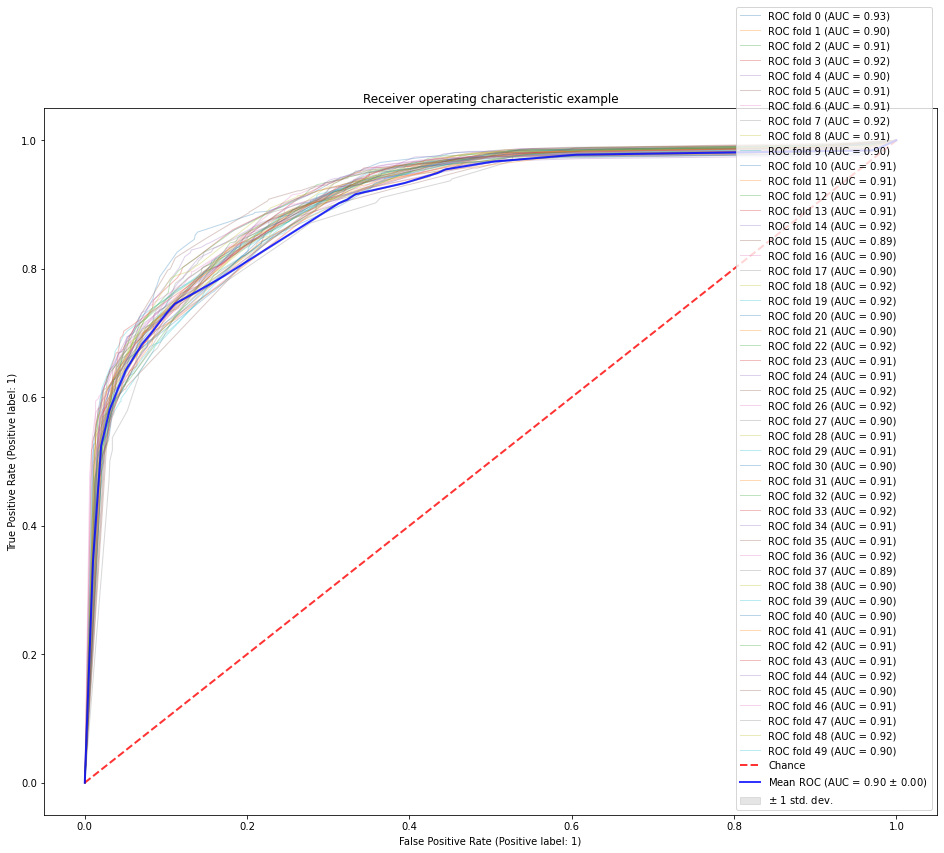

{LogisticRegression(penalty='none'): (0.7790924313462827, 0.7778804620793571),
 Pipeline(steps=[('ridge', RidgeClassifier(alpha=0.1))]): (0.7115572672471535,
  0.7122852837769965),
 DecisionTreeClassifier(max_depth=10): (0.8559912926992633,
  0.8214665996986439)}

In [62]:
#Use grid search to decide the depth of Decision tree
depthlist = [1,2,3,4,5,6,7,8,9,10]
dtr = DecisionTreeClassifier()
param_grid={'max_depth':depthlist}
cvf = ShuffleSplit(test_size=0.25,n_splits=50)
grid_search=GridSearchCV(dtr,param_grid,cv=cvf,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
yhat = grid_search.predict(X)
cmat = confusion_matrix(y, yhat)
print(f'The confusion matrix is {cmat}')
best_model = grid_search.best_estimator_
getBestScore(best_model, 0.25, 50)

The confusion matrix is [[3566  353]
 [ 638 3406]]
The score for test is 0.8499146157709694


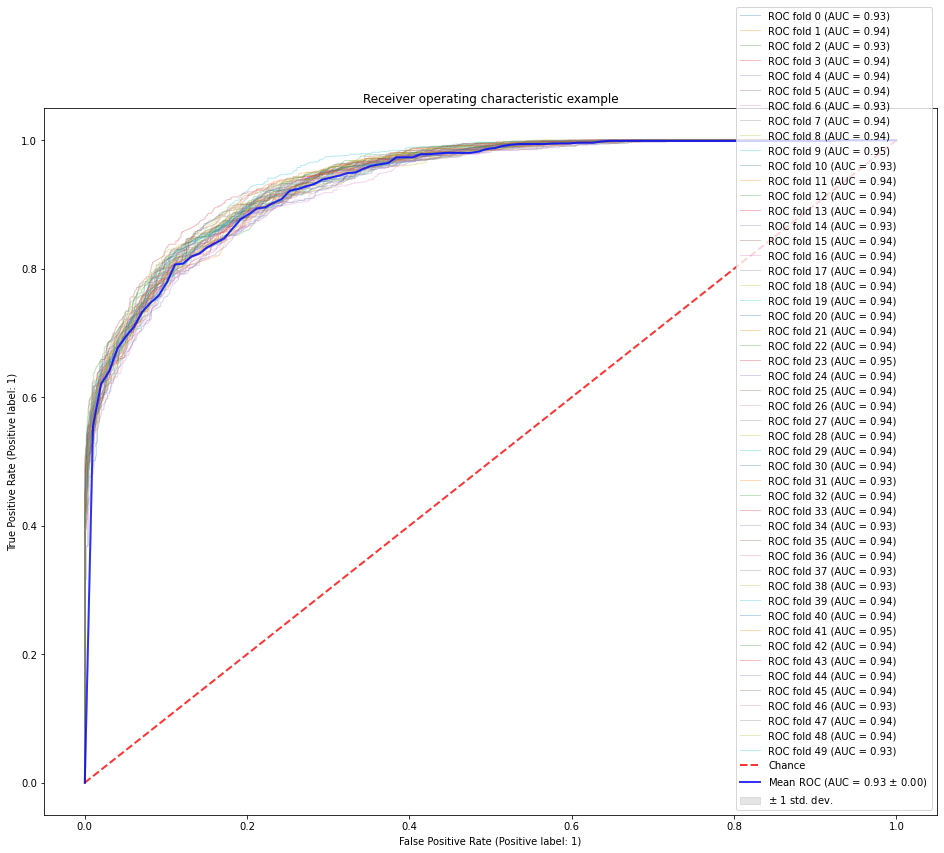

{LogisticRegression(penalty='none'): (0.7790924313462827, 0.7778804620793571),
 Pipeline(steps=[('ridge', RidgeClassifier(alpha=0.1))]): (0.7115572672471535,
  0.7122852837769965),
 DecisionTreeClassifier(max_depth=10): (0.8559912926992633,
  0.8214665996986439),
 RandomForestClassifier(max_depth=10, max_features=4, n_estimators=80): (0.8814434025452109,
  0.8499146157709694)}

In [63]:
depthlist = [1,2,3,4,5,6,7,8,9,10]
forest = RandomForestClassifier()
param_grid={'max_depth':depthlist,'n_estimators':[20,40,60,80,100],'max_features': [1,2,3,4]}
cvf = ShuffleSplit(test_size=0.25,n_splits=50)
grid_search=GridSearchCV(forest,param_grid,cv=cvf,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
yhat = grid_search.predict(X)
cmat = confusion_matrix(y, yhat)
print(f'The confusion matrix is {cmat}')
best_model = grid_search.best_estimator_
getBestScore(best_model, 0.25, 50)

The confusion matrix is [[3680  239]
 [1523 2521]]
The score for test is 0.7779407332998493


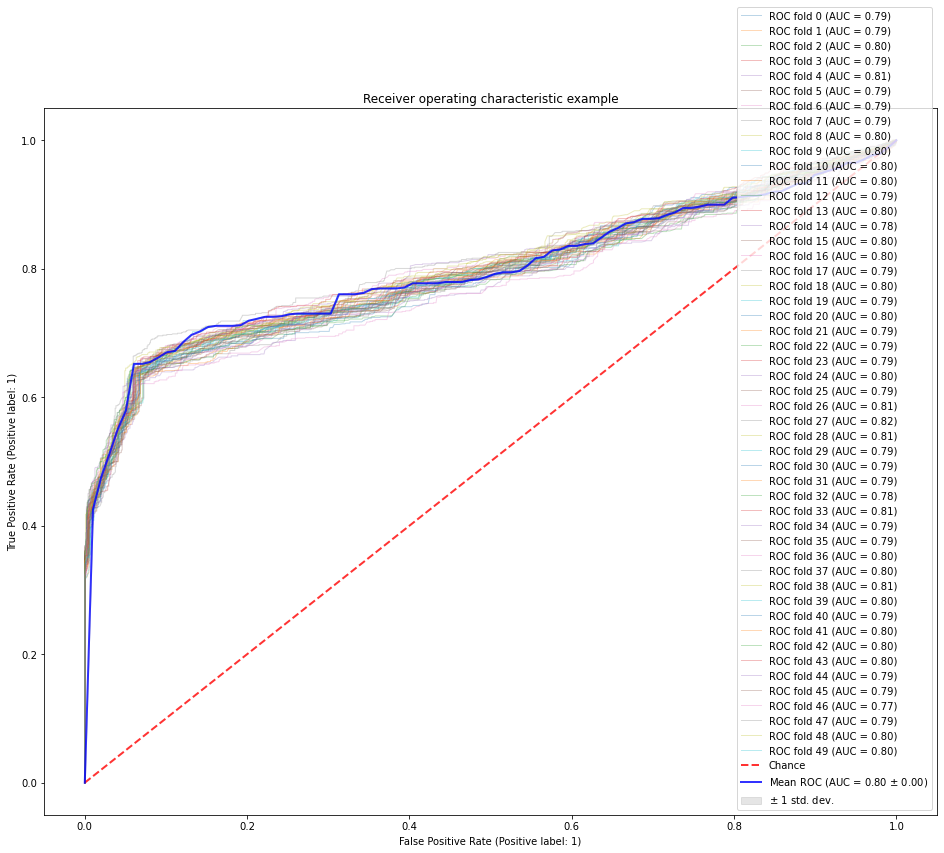

{LogisticRegression(penalty='none'): (0.7790924313462827, 0.7778804620793571),
 Pipeline(steps=[('ridge', RidgeClassifier(alpha=0.1))]): (0.7115572672471535,
  0.7122852837769965),
 DecisionTreeClassifier(max_depth=10): (0.8559912926992633,
  0.8214665996986439),
 RandomForestClassifier(max_depth=10, max_features=4, n_estimators=80): (0.8814434025452109,
  0.8499146157709694),
 SVC(kernel='linear'): (0.7783389149363699, 0.7779407332998493)}

In [64]:
# Linear svm
lsv = SVC(kernel="linear",C=1.)
lsv.fit(X,y)
yhat = lsv.predict(X)
cmat = confusion_matrix(y, yhat)
print(f'The confusion matrix is {cmat}')
getBestScore(lsv, 0.25, 50)

In [65]:
best_model_all = sorted(model_score.items(),key = lambda x:x[1],reverse = True)[0]
print("Ranking of compute time: ",sorted(model_score.items(),key = lambda x:x[1],reverse = True))
print("\n")
print(f'Best model is {best_model_all}')

Ranking of compute time:  [(RandomForestClassifier(max_depth=10, max_features=4, n_estimators=80), (0.8814434025452109, 0.8499146157709694)), (DecisionTreeClassifier(max_depth=10), (0.8559912926992633, 0.8214665996986439)), (LogisticRegression(penalty='none'), (0.7790924313462827, 0.7778804620793571)), (SVC(kernel='linear'), (0.7783389149363699, 0.7779407332998493)), (Pipeline(steps=[('ridge', RidgeClassifier(alpha=0.1))]), (0.7115572672471535, 0.7122852837769965))]


Best model is (RandomForestClassifier(max_depth=10, max_features=4, n_estimators=80), (0.8814434025452109, 0.8499146157709694))


### New dataset is generated for validation to see whether the model I selected is consistent with a good score all the time

In [66]:
sampler = SMOTEN()
Xnew, ynew = sampler.fit_resample(X, y)

In [67]:
model = best_model_all[0]

shuffle = ShuffleSplit(n_splits=50, test_size=0.25)
CVInfo = cross_validate(model, Xnew, ynew, cv=shuffle, return_train_score=True)
trainscore = (np.mean(CVInfo['train_score']))
testscore = (np.mean(CVInfo['test_score']))
print(f'The average training score for new dataset is {trainscore}')
print(f'The average test score for new dataset is {testscore}')

The average training score for new dataset is 0.8814276294098252
The average test score for new dataset is 0.8495054401582592


### From the new dataset, the random forest classifier model still give us a nice score, this model will used as the final model to do the prediction.

### Use the following code, the predicted outcome would be stored in a dataframe automatically. Let us assume 'Customer_info' consists all the independent variables we need for prediction, and this file is loaded to python terminals with the same name, which means in python, the dataframe is called Customer_info as well.

# !!The following block cannot be runned unless have the prediction file loaded!!

In [ ]:
bestmodel = best_model_all[0]
y_pred = bestmodel.predict(Customer_info)
df_result = pd.DataFrame({Customer_info,'Outcome':y_pred})
df_result['Outcome']=df_result['Outcome'].astype('int')
df_result.to_csv('randomforest_forecast',index = False)